In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('../time_series_data.csv')
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,A,123.180000,124.250000,121.629997,122.309998,120.425545,1733100.0
1,2022-09-27,A,123.870003,124.070000,120.599998,121.610001,119.736313,1040500.0
2,2022-09-28,A,122.769997,124.430000,121.599998,123.720001,121.813828,1361200.0
3,2022-09-29,A,122.809998,124.239998,122.279999,122.739998,120.848915,1312800.0
4,2022-09-30,A,123.019997,125.129997,121.379997,121.550003,119.677254,1624200.0


In [43]:
df['Date'] = pd.to_datetime(df['Date'] , format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250834 entries, 0 to 250833
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       250834 non-null  datetime64[ns]
 1   Ticker     250834 non-null  object        
 2   Open       250834 non-null  float64       
 3   High       250834 non-null  float64       
 4   Low        250834 non-null  float64       
 5   Close      250834 non-null  float64       
 6   Adj Close  250834 non-null  float64       
 7   Volume     250834 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 15.3+ MB


In [49]:
print(f"Number of unique stocks: {df['Ticker'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

Number of unique stocks: 501
Date range: 2022-09-26 00:00:00 to 2024-09-27 00:00:00


In [45]:
df.isnull().sum() ## none info as null.

Date         0
Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250834,250834.000000,250834.000000,250834.000000,250834.000000,250834.000000,2.508340e+05
mean,2023-09-27 19:13:11.576899328,181.607819,183.600100,179.645062,181.672222,179.459584,5.939299e+06
min,2022-09-26 00:00:00,5.179000,5.365000,5.028000,5.215000,5.215000,0.000000e+00
25%,2023-03-28 00:00:00,59.630001,60.272500,58.986251,59.639999,58.001919,1.002400e+06
50%,2023-09-28 00:00:00,107.889999,109.139999,106.690002,107.965000,105.616219,2.030000e+06
75%,2024-04-01 00:00:00,203.199997,205.389999,201.000000,203.250000,200.849396,4.603675e+06
max,2024-09-27 00:00:00,9693.620117,9820.000000,9593.129883,9734.549805,9734.549805,1.543911e+09
std,NaN,371.950835,376.069409,368.207174,372.234281,371.793999,2.438103e+07


#### Visualising overall market trend:

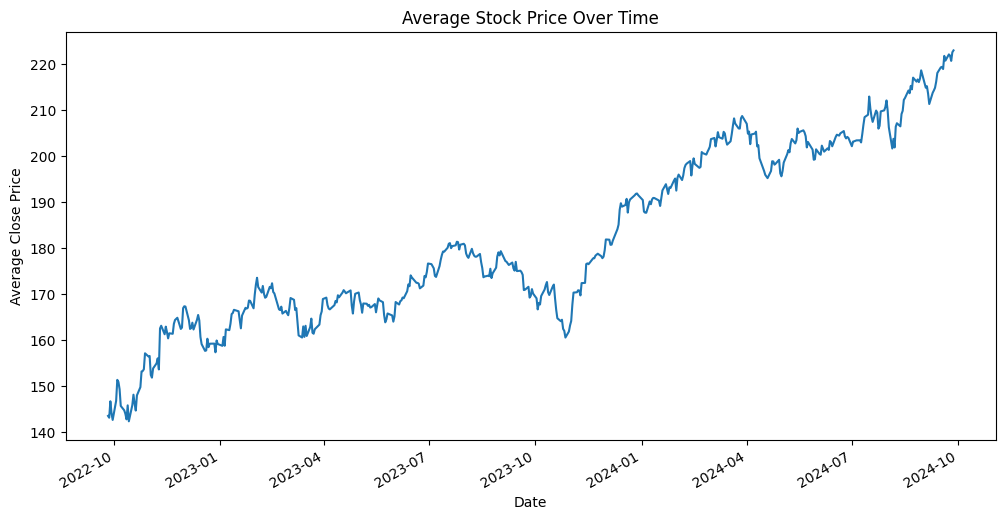

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.groupby('Date')['Close'].mean().plot()
plt.title('Average Stock Price Over Time')
plt.ylabel('Average Close Price')
plt.show()

### Calculate and visualize daily returns:

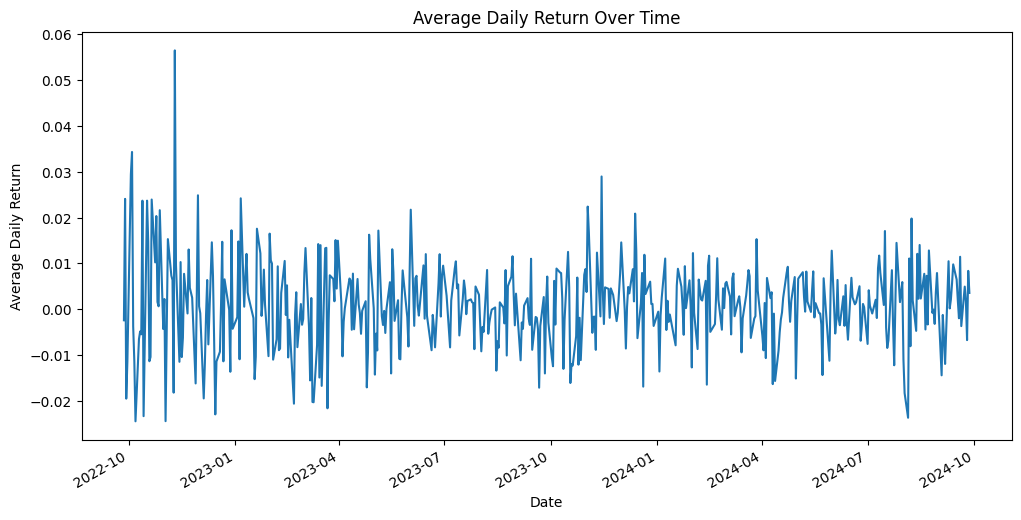

In [52]:
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(12,6))
df.groupby('Date')['Daily Return'].mean().plot()
plt.title('Average Daily Return Over Time')
plt.ylabel('Average Daily Return')
plt.show()

### Volatility analysis:

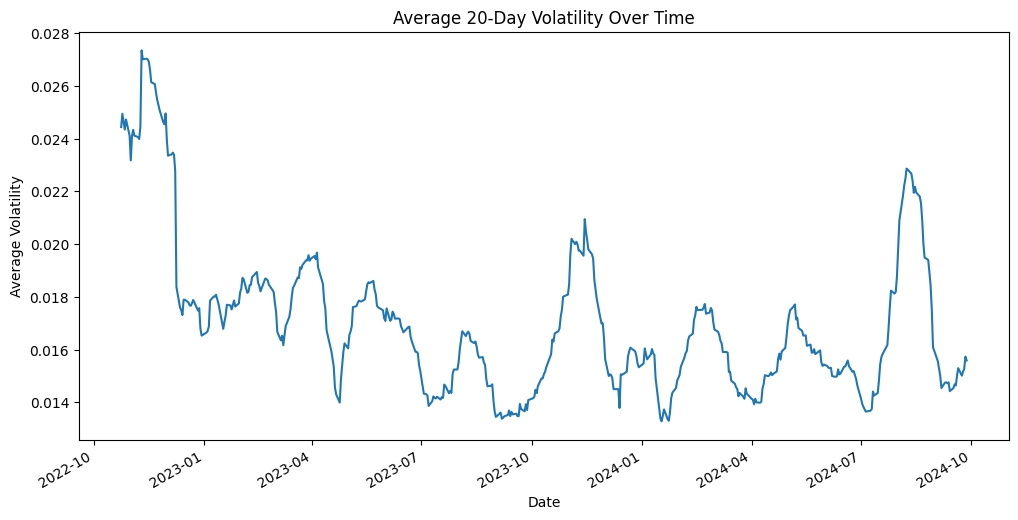

In [54]:
 # Calculate the rolling 20-day standard deviation of daily returns for each ticker to measure volatility
df['Volatility'] = df.groupby('Ticker')['Daily Return'].rolling(window=20).std().reset_index(0,drop=True) # write comments here 

plt.figure(figsize=(12,6))
df.groupby('Date')['Volatility'].mean().plot()
plt.title('Average 20-Day Volatility Over Time')
plt.ylabel('Average Volatility')
plt.show()

### Volume analysis:


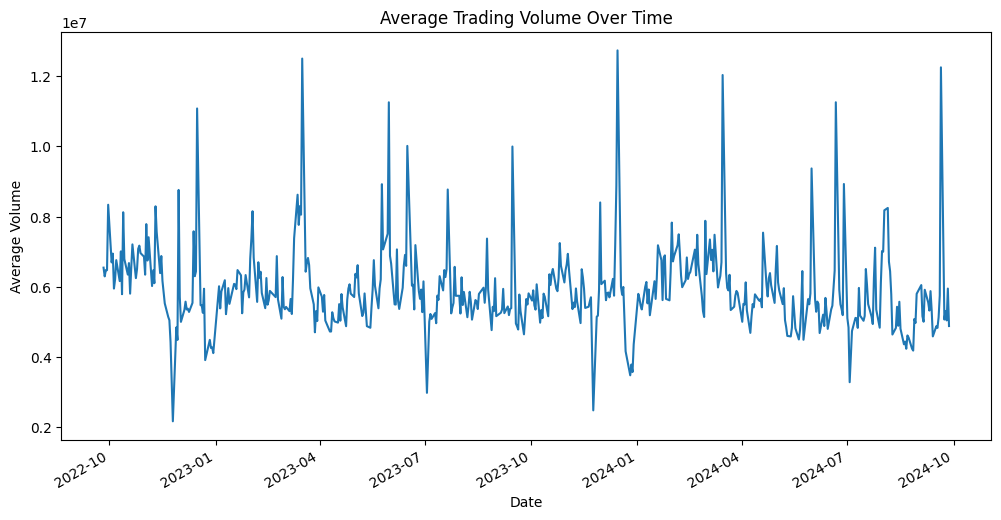

In [55]:
plt.figure(figsize=(12,6))
df.groupby('Date')['Volume'].mean().plot()
plt.title('Average Trading Volume Over Time')
plt.ylabel('Average Volume')
plt.show()

### Identifing top performing and worst performing stocks:

In [61]:
performance = df.groupby('Ticker')['Daily Return'].mean().sort_values(ascending=False)
print("Top 5 performing stocks:")
print(performance.head())
print("\nBottom 5 performing stocks:")
print(performance.tail())

Top 5 performing stocks:
Ticker
SMCI    0.005613
NVDA    0.005115
GEV     0.005022
PLTR    0.003968
VST     0.003638
Name: Daily Return, dtype: float64

Bottom 5 performing stocks:
Ticker
EL     -0.001322
ALB    -0.001455
DG     -0.001638
WBA    -0.002219
AMTM   -0.045379
Name: Daily Return, dtype: float64


### Trend Analysis

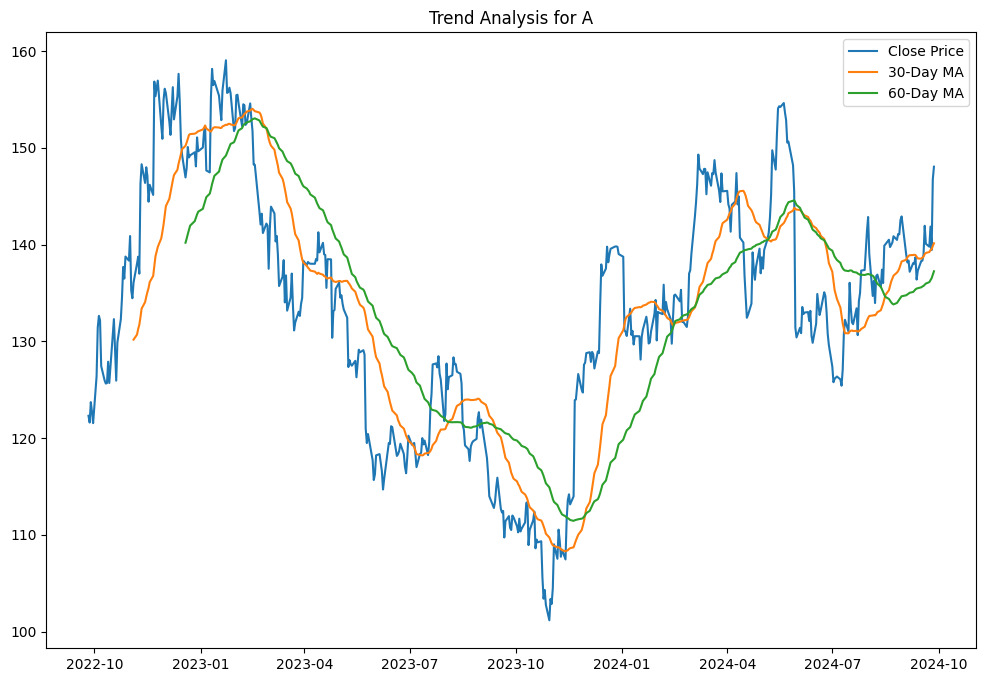

In [68]:
# Calculate 30-day and 60-day rolling mean and standard deviation
df['30D_MA'] = df.groupby('Ticker')['Close'].rolling(window=30).mean().reset_index(0,drop=True)
df['60D_MA'] = df.groupby('Ticker')['Close'].rolling(window=60).mean().reset_index(0,drop=True)
df['30D_STD'] = df.groupby('Ticker')['Close'].rolling(window=30).std().reset_index(0,drop=True)

# Calculate volatility (20-day rolling standard deviation of log returns)
df['Log_Return'] = np.log(df.groupby('Ticker')['Close'].pct_change() + 1)
df['Volatility'] = df.groupby('Ticker')['Log_Return'].rolling(window=20).std().reset_index(0,drop=True)

# Plot for a sample stock (e.g., first stock in the dataset)
sample_stock = df['Ticker'].unique()[0]
sample_df = df[df['Ticker'] == sample_stock]

plt.figure(figsize=(12,8))
plt.plot(sample_df['Date'], sample_df['Close'], label='Close Price')
plt.plot(sample_df['Date'], sample_df['30D_MA'], label='30-Day MA')
plt.plot(sample_df['Date'], sample_df['60D_MA'], label='60-Day MA')
plt.title(f'Trend Analysis for {sample_stock}')
plt.legend()
plt.show()

### Stock Return Distribution


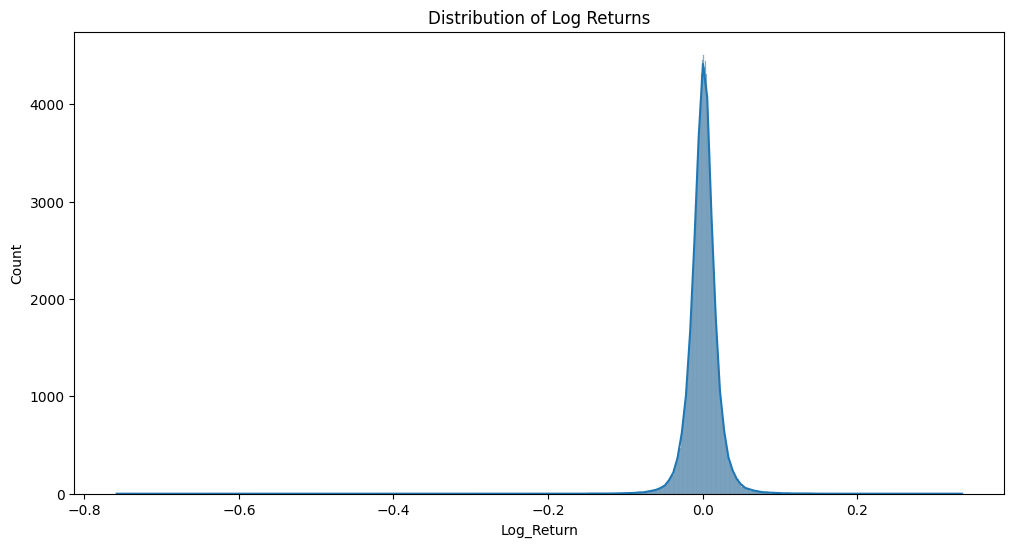

In [72]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df['Log_Return'].dropna(), kde=True)
plt.title('Distribution of Log Returns')
plt.show()

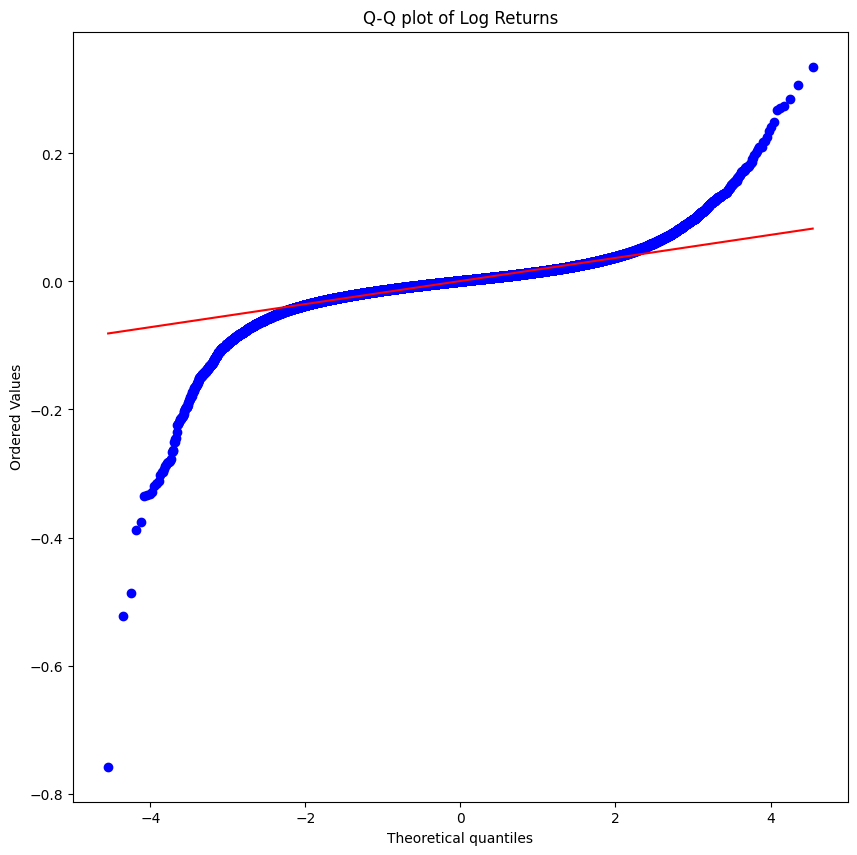

In [73]:
# QQ Plot to check for normality
from scipy import stats
plt.figure(figsize=(10,10))
stats.probplot(df['Log_Return'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q plot of Log Returns")
plt.show()


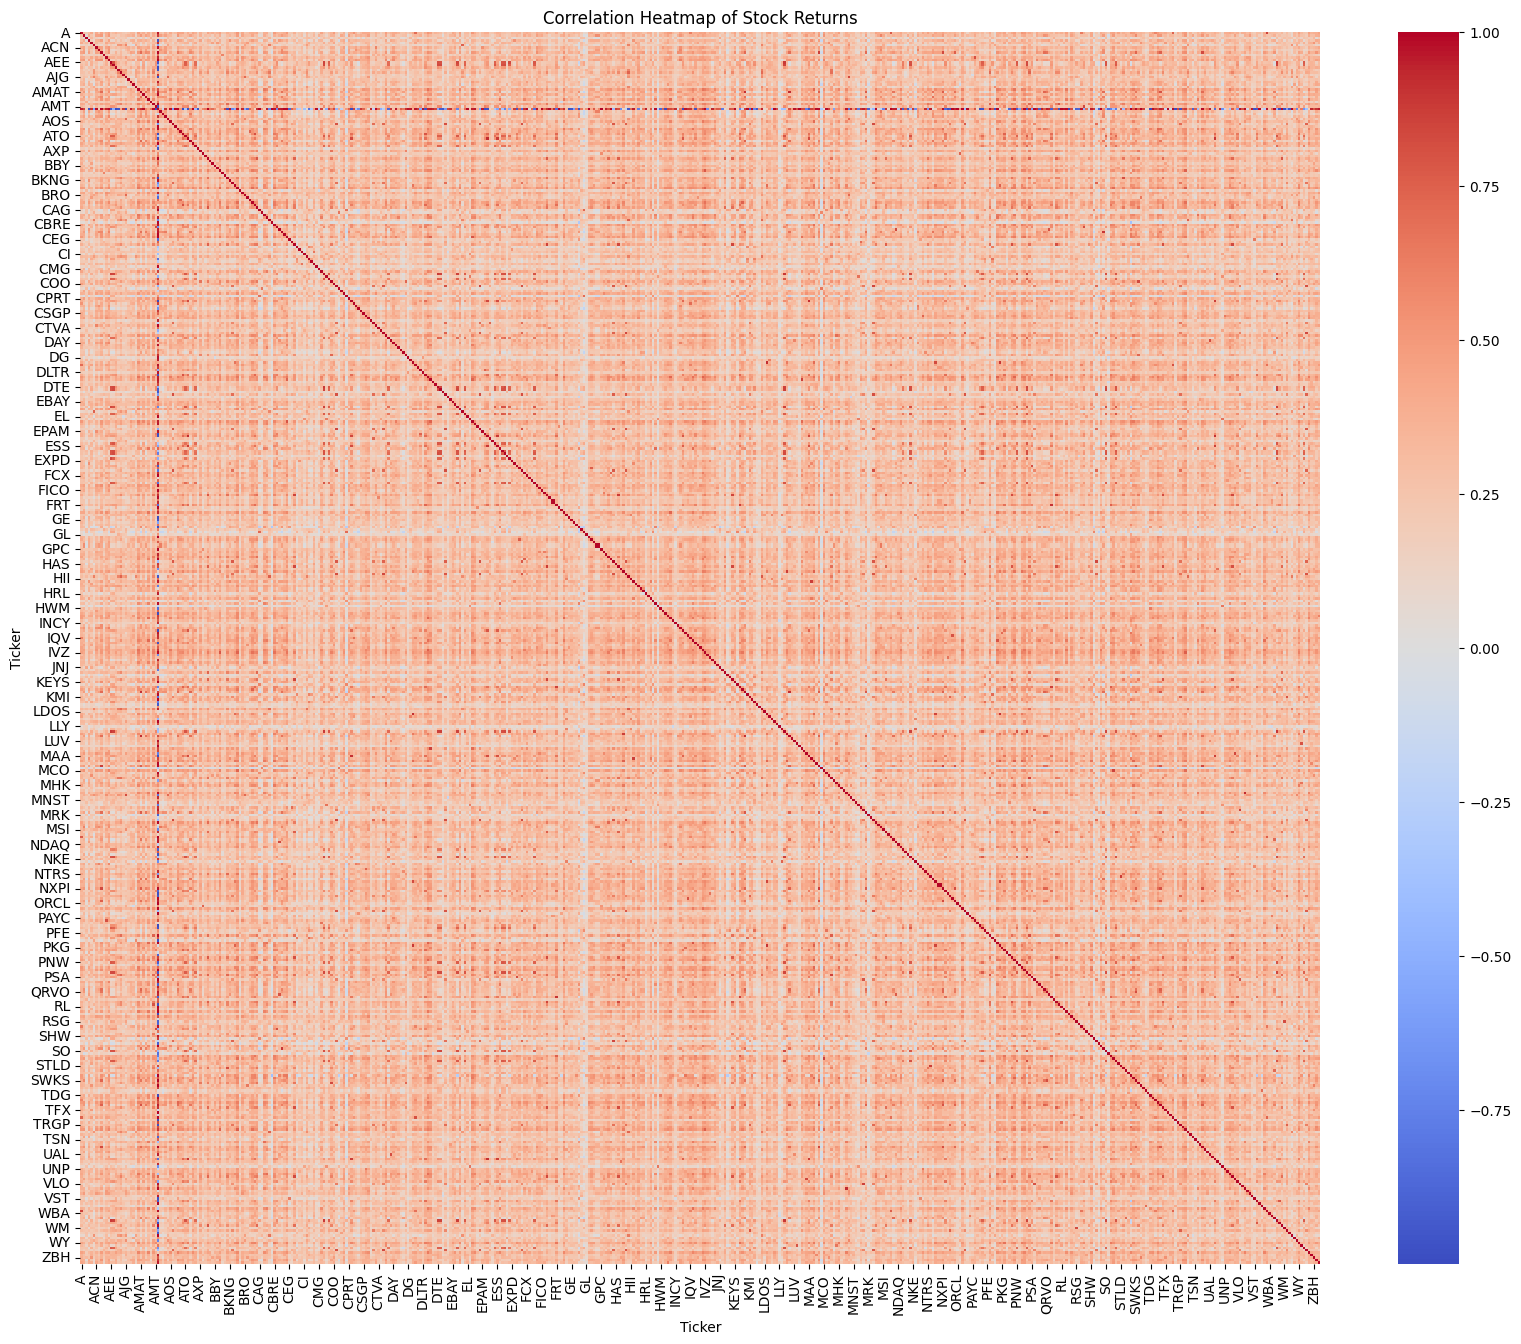

In [74]:
# Pivot the data to have each stock as a column
price_df = df.pivot(index='Date', columns='Ticker', values='Close')

# Calculate correlation
corr_matrix = price_df.pct_change().corr()

# Plot correlation heatmap
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Stock Returns')
plt.show()

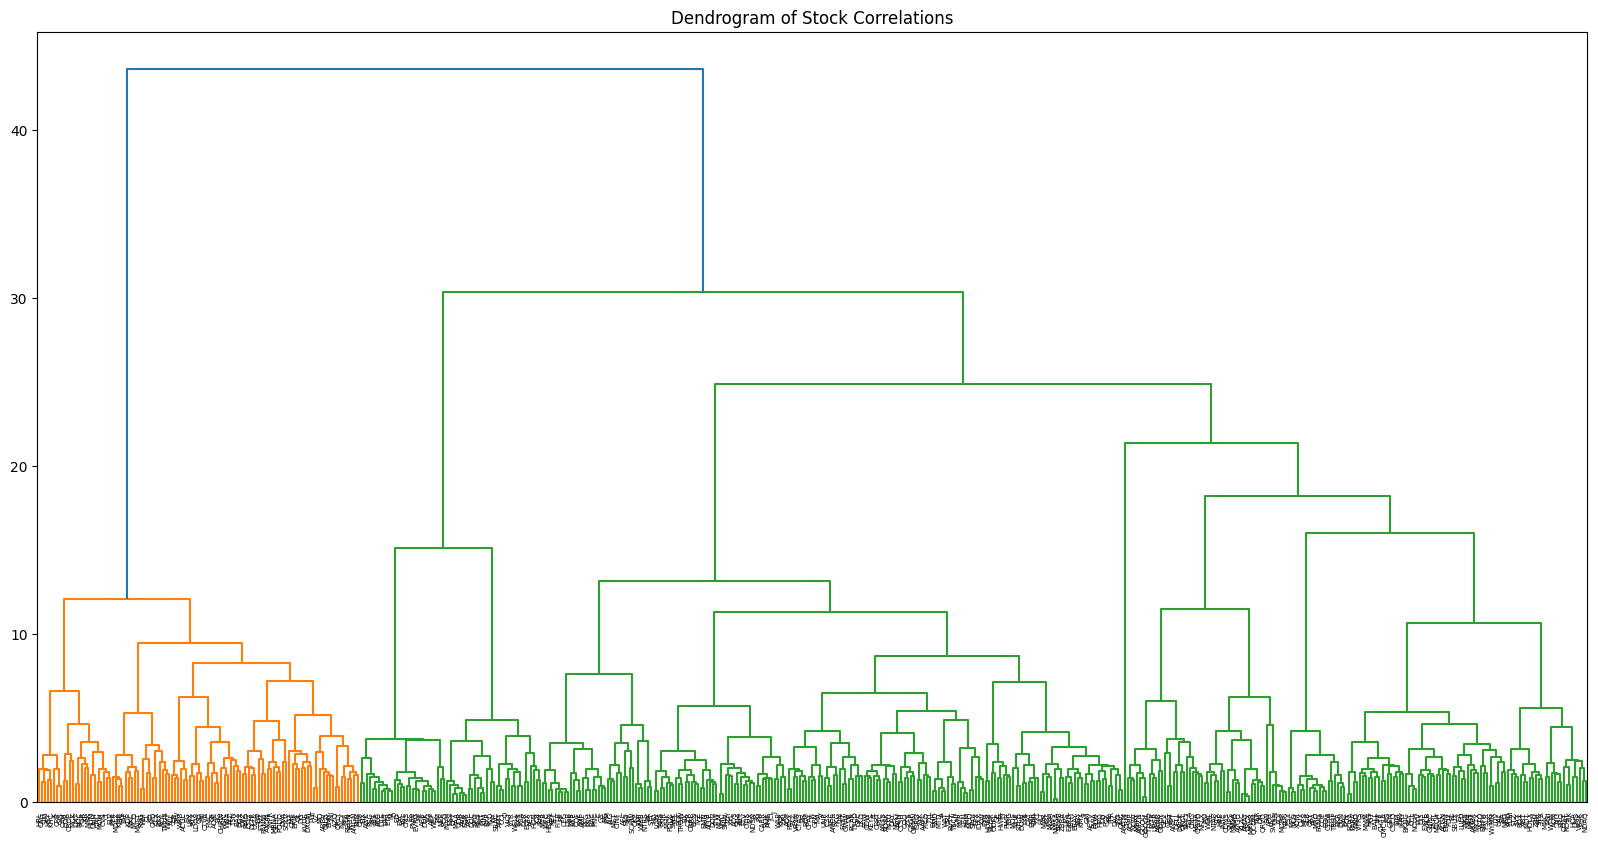

In [75]:
# Identify clusters of highly correlated stocks
from scipy.cluster import hierarchy

# Perform hierarchical clustering
linkage = hierarchy.linkage(corr_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(20,10))
hierarchy.dendrogram(linkage, labels=corr_matrix.index, leaf_rotation=90)
plt.title('Dendrogram of Stock Correlations')
plt.show()

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Load the data
df = pd.read_csv('../time_series_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data
price_df = df.pivot(index='Date', columns='Ticker', values='Close')

# Calculate correlation
corr_matrix = price_df.pct_change().corr()
corr_matrix

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.293481,0.207034,0.293278,0.412793,0.138800,0.408878,0.260843,0.452888,0.250443,...,0.272574,0.438048,0.322255,0.246755,0.230340,0.460872,0.354133,0.382598,0.387506,0.443558
AAPL,0.293481,1.000000,0.037795,0.396264,0.242232,0.139979,0.447907,0.458631,0.495651,0.111166,...,0.239207,0.369459,0.262057,0.243678,0.180632,0.401731,0.280074,0.282107,0.386003,0.393564
ABBV,0.207034,0.037795,1.000000,0.015445,0.327074,0.179609,0.165284,0.106490,0.082760,0.145745,...,0.257091,0.206612,0.122551,0.264084,0.230634,0.185667,0.198630,0.321326,0.044994,0.179223
ABNB,0.293278,0.396264,0.015445,1.000000,0.183640,0.094046,0.347462,0.380166,0.466324,0.145956,...,0.168951,0.346893,0.313899,0.054618,0.180445,0.307918,0.235726,0.249568,0.414724,0.385105
ABT,0.412793,0.242232,0.327074,0.183640,1.000000,0.207864,0.322332,0.223396,0.245315,0.151008,...,0.342133,0.362793,0.176308,0.373727,0.155258,0.363427,0.369981,0.523361,0.247952,0.377718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.460872,0.401731,0.185667,0.307918,0.363427,0.263453,0.381514,0.283220,0.477368,0.276277,...,0.360958,0.488388,0.324168,0.310451,0.232056,1.000000,0.406060,0.374346,0.372546,0.363975
YUM,0.354133,0.280074,0.198630,0.235726,0.369981,0.250789,0.299450,0.213707,0.354853,0.253812,...,0.305228,0.343503,0.330833,0.347387,0.221623,0.406060,1.000000,0.375388,0.291325,0.325204
ZBH,0.382598,0.282107,0.321326,0.249568,0.523361,0.188664,0.323083,0.262912,0.363489,0.205389,...,0.312208,0.404787,0.250195,0.331228,0.241829,0.374346,0.375388,1.000000,0.343410,0.372065


In [91]:
# Perform hierarchical clustering
linkage = hierarchy.linkage(corr_matrix, method='ward')

# Determine number of clusters (you can adjust this)
n_clusters = 8

# Create cluster labels
cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(corr_matrix)

# Add cluster labels to correlation matrix
corr_matrix['Cluster'] = cluster_labels

# Load sector information
sector_info = pd.read_csv('../stock_info.csv')

# Merge cluster information with sector information
cluster_sector = pd.merge(corr_matrix['Cluster'], sector_info, left_index=True, right_on='Ticker')

# Analyze cluster composition
cluster_composition = cluster_sector.groupby('Cluster')['Sector'].value_counts().unstack(fill_value=0)
cluster_composition_pct = cluster_composition.div(cluster_composition.sum(axis=1), axis=0)


In [84]:
cluster_composition_pct

Sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Unknown,Utilities
Cluster,,,,,,,,,,,,
0,0.026846,0.100671,0.154362,0.033557,0.127517,0.060403,0.087248,0.053691,0.000000,0.328859,0.0,0.026846
1,0.000000,0.000000,0.000000,0.016949,0.000000,0.016949,0.000000,0.016949,0.474576,0.000000,0.0,0.474576
2,0.028846,0.028846,0.057692,0.288462,0.000000,0.115385,0.346154,0.096154,0.000000,0.038462,0.0,0.000000
3,0.079787,0.021277,0.138298,0.000000,0.015957,0.234043,0.074468,0.265957,0.015957,0.154255,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000


<Figure size 1500x1000 with 0 Axes>

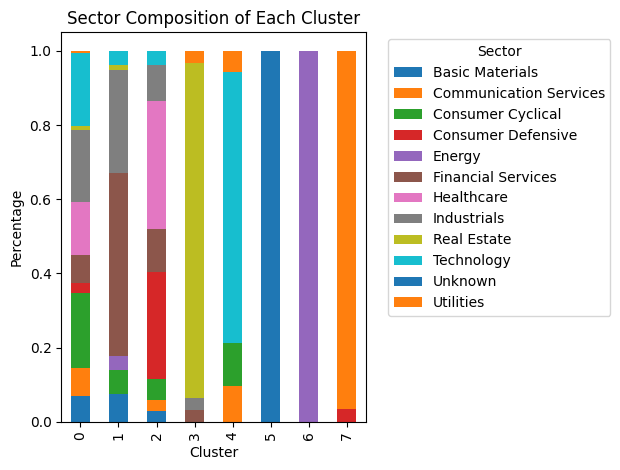

In [92]:
# Visualize cluster composition
plt.figure(figsize=(15, 10))
cluster_composition_pct.plot(kind='bar', stacked=True)
plt.title('Sector Composition of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 1. Identify clusters and assign each stock to a cluster



In [145]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at a certain height to determine the number of clusters
n_clusters = 5  # adjust this value based on the dendrogram
cluster_assignments = fcluster(linkage, n_clusters, criterion='distance')

# Create a dictionary to store the cluster assignments
cluster_dict = {}
for i, stock in enumerate(corr_matrix.index):
    cluster_dict[stock] = cluster_assignments[i]

cluster_dict

{'A': 18,
 'AAPL': 17,
 'ABBV': 9,
 'ABNB': 21,
 'ABT': 28,
 'ACGL': 5,
 'ACN': 17,
 'ADBE': 21,
 'ADI': 24,
 'ADM': 6,
 'ADP': 16,
 'ADSK': 17,
 'AEE': 10,
 'AEP': 10,
 'AES': 11,
 'AFL': 13,
 'AIG': 13,
 'AIZ': 6,
 'AJG': 29,
 'AKAM': 27,
 'ALB': 27,
 'ALGN': 27,
 'ALL': 5,
 'ALLE': 14,
 'AMAT': 23,
 'AMCR': 16,
 'AMD': 23,
 'AME': 15,
 'AMGN': 9,
 'AMP': 12,
 'AMT': 11,
 'AMTM': 30,
 'AMZN': 21,
 'ANET': 22,
 'ANSS': 17,
 'AON': 29,
 'AOS': 15,
 'APA': 25,
 'APD': 28,
 'APH': 24,
 'APTV': 20,
 'ARE': 11,
 'ATO': 10,
 'AVB': 11,
 'AVGO': 23,
 'AVY': 15,
 'AWK': 10,
 'AXON': 7,
 'AXP': 12,
 'AZO': 9,
 'BA': 27,
 'BAC': 12,
 'BALL': 26,
 'BAX': 6,
 'BBY': 20,
 'BDX': 28,
 'BEN': 14,
 'BG': 6,
 'BIIB': 9,
 'BK': 13,
 'BKNG': 27,
 'BKR': 25,
 'BLDR': 19,
 'BLK': 14,
 'BMY': 9,
 'BR': 16,
 'BRO': 29,
 'BSX': 4,
 'BWA': 20,
 'BX': 14,
 'BXP': 11,
 'C': 12,
 'CAG': 1,
 'CAH': 2,
 'CARR': 15,
 'CAT': 20,
 'CB': 5,
 'CBOE': 2,
 'CBRE': 14,
 'CCI': 11,
 'CCL': 27,
 'CDNS': 23,
 'CDW': 17,
 'CE

## 2. Sector analysis

In [122]:
# Load sector information for each stock (e.g., from Yahoo Finance or Quandl)
sector_df = pd.read_csv('../stock_info.csv', index_col='Ticker')

# Merge sector information with cluster assignments
cluster_sector_df = pd.DataFrame({'Cluster': cluster_dict, 'Sector': sector_df['Sector']})

# Analyze sector composition of each cluster
for cluster in cluster_sector_df['Cluster'].unique():
    sector_counts = cluster_sector_df[cluster_sector_df['Cluster'] == cluster]['Sector'].value_counts()
    print(f'Cluster {cluster}: {sector_counts}')

Cluster 18.0: Sector
Healthcare            10
Consumer Cyclical      4
Financial Services     2
Industrials            1
Name: count, dtype: int64
Cluster 17.0: Sector
Technology            15
Healthcare             4
Industrials            1
Real Estate            1
Financial Services     1
Name: count, dtype: int64
Cluster 9.0: Sector
Healthcare                10
Consumer Cyclical          2
Communication Services     2
Consumer Defensive         1
Name: count, dtype: int64
Cluster 21.0: Sector
Technology                7
Communication Services    3
Consumer Cyclical         2
Name: count, dtype: int64
Cluster 28.0: Sector
Healthcare            8
Consumer Defensive    2
Basic Materials       1
Consumer Cyclical     1
Name: count, dtype: int64
Cluster 5.0: Sector
Financial Services    6
Name: count, dtype: int64
Cluster 24.0: Sector
Technology           6
Consumer Cyclical    1
Name: count, dtype: int64
Cluster 6.0: Sector
Industrials           5
Healthcare            4
Consumer Defen

## 3. Diversification insights



In [123]:
# Calculate the average correlation within each cluster
cluster_corr = {}
for cluster in cluster_sector_df['Cluster'].unique():
    cluster_stocks = cluster_sector_df[cluster_sector_df['Cluster'] == cluster].index
    cluster_corr[cluster] = price_df[cluster_stocks].corr().mean().mean()

print('Average correlation within each cluster:')
print(cluster_corr)

Average correlation within each cluster:
{18.0: 0.46748147546180974, 17.0: 0.5475838149207951, 9.0: 0.19053219848129466, 21.0: 0.8474363249034592, 28.0: 0.3306857015429311, 5.0: 0.7593219786391531, 24.0: 0.6466563657325111, 6.0: 0.19193502516270433, 16.0: 0.3641267465266673, 10.0: 0.5649488885059571, 11.0: 0.37807363937490307, 13.0: 0.6702985120195221, 29.0: 0.671094653142983, 27.0: 0.0879947345671005, 14.0: 0.509841455083912, 23.0: 0.7004615722963783, 15.0: 0.6399260483943912, 12.0: 0.7117805781049555, 30.0: 1.0, 22.0: 0.7081819988012559, 25.0: 0.3606003757902428, 20.0: 0.3446603749556969, 7.0: 0.2114548998218973, 26.0: 0.19088084538515485, nan: nan, 19.0: 0.8754510726391109, 4.0: 0.6955041209813203, 1.0: 0.7375283142836334, 2.0: 0.29841620217009324, 8.0: 0.08545847585545588, 3.0: 0.3597512413167918}


In [146]:
cluster_corr

{18.0: 0.46748147546180974,
 17.0: 0.5475838149207951,
 9.0: 0.19053219848129466,
 21.0: 0.8474363249034592,
 28.0: 0.3306857015429311,
 5.0: 0.7593219786391531,
 24.0: 0.6466563657325111,
 6.0: 0.19193502516270433,
 16.0: 0.3641267465266673,
 10.0: 0.5649488885059571,
 11.0: 0.37807363937490307,
 13.0: 0.6702985120195221,
 29.0: 0.671094653142983,
 27.0: 0.0879947345671005,
 14.0: 0.509841455083912,
 23.0: 0.7004615722963783,
 15.0: 0.6399260483943912,
 12.0: 0.7117805781049555,
 30.0: 1.0,
 22.0: 0.7081819988012559,
 25.0: 0.3606003757902428,
 20.0: 0.3446603749556969,
 7.0: 0.2114548998218973,
 26.0: 0.19088084538515485,
 nan: nan,
 19.0: 0.8754510726391109,
 4.0: 0.6955041209813203,
 1.0: 0.7375283142836334,
 2.0: 0.29841620217009324,
 8.0: 0.08545847585545588,
 3.0: 0.3597512413167918}

## 4. Feature engineering (cluster ID as a feature)



In [124]:
# Create a new feature column in your dataset with the cluster ID
price_df['Cluster'] = price_df.index.map(cluster_dict)

## 5. Anomaly detection



In [128]:
cluster_dict[sector_stocks[0]]

30

In [129]:
# Identify stocks that don't cluster with their sector peers
anomaly_stocks = []
for sector in sector_df['Sector'].unique():
    sector_stocks = sector_df[sector_df['Sector'] == sector].index
    sector_cluster = cluster_dict[sector_stocks[0]]
    for stock in sector_stocks:
        try:
            if cluster_dict[stock] != sector_cluster:
                anomaly_stocks.append(stock)
        except KeyError:
            pass

print('Anomaly stocks:')
print(anomaly_stocks)

Anomaly stocks:
['ABBV', 'ABT', 'ALGN', 'AMGN', 'BAX', 'BDX', 'BIIB', 'BMY', 'BSX', 'CAH', 'CI', 'CNC', 'COO', 'COR', 'CTLT', 'CVS', 'DGX', 'DVA', 'DXCM', 'ELV', 'EW', 'GEHC', 'GILD', 'HCA', 'HOLX', 'HSIC', 'HUM', 'INCY', 'ISRG', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MOH', 'MRK', 'MRNA', 'PFE', 'PODD', 'REGN', 'RMD', 'SOLV', 'STE', 'SYK', 'TFX', 'UHS', 'UNH', 'VRTX', 'VTRS', 'WBA', 'WST', 'ZBH', 'ZTS', 'ADBE', 'ADI', 'ADP', 'AKAM', 'AMAT', 'AMD', 'ANET', 'APH', 'AVGO', 'BR', 'CDNS', 'CPAY', 'CRM', 'CRWD', 'CSCO', 'DELL', 'ENPH', 'EPAM', 'FI', 'FIS', 'FSLR', 'FTNT', 'FTV', 'GDDY', 'GEN', 'GLW', 'HPE', 'HPQ', 'IBM', 'INTC', 'JBL', 'JKHY', 'JNPR', 'KLAC', 'LDOS', 'LRCX', 'MCHP', 'MPWR', 'MSFT', 'MSI', 'MU', 'NOW', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PAYC', 'PAYX', 'PLTR', 'QCOM', 'QRVO', 'ROP', 'SMCI', 'SNPS', 'STX', 'SWKS', 'TDY', 'TEL', 'TER', 'TRMB', 'TXN', 'UBER', 'VRSN', 'WDC', 'ZBRA', 'AMCR', 'APTV', 'AVY', 'AZO', 'BALL', 'BBY', 'BKNG', 'BWA', 'CCL', 'CMG', 'CZR', 'DECK', 'D

In [147]:
anomaly_stocks

['ABBV',
 'ABT',
 'ALGN',
 'AMGN',
 'BAX',
 'BDX',
 'BIIB',
 'BMY',
 'BSX',
 'CAH',
 'CI',
 'CNC',
 'COO',
 'COR',
 'CTLT',
 'CVS',
 'DGX',
 'DVA',
 'DXCM',
 'ELV',
 'EW',
 'GEHC',
 'GILD',
 'HCA',
 'HOLX',
 'HSIC',
 'HUM',
 'INCY',
 'ISRG',
 'JNJ',
 'LH',
 'LLY',
 'MCK',
 'MDT',
 'MOH',
 'MRK',
 'MRNA',
 'PFE',
 'PODD',
 'REGN',
 'RMD',
 'SOLV',
 'STE',
 'SYK',
 'TFX',
 'UHS',
 'UNH',
 'VRTX',
 'VTRS',
 'WBA',
 'WST',
 'ZBH',
 'ZTS',
 'ADBE',
 'ADI',
 'ADP',
 'AKAM',
 'AMAT',
 'AMD',
 'ANET',
 'APH',
 'AVGO',
 'BR',
 'CDNS',
 'CPAY',
 'CRM',
 'CRWD',
 'CSCO',
 'DELL',
 'ENPH',
 'EPAM',
 'FI',
 'FIS',
 'FSLR',
 'FTNT',
 'FTV',
 'GDDY',
 'GEN',
 'GLW',
 'HPE',
 'HPQ',
 'IBM',
 'INTC',
 'JBL',
 'JKHY',
 'JNPR',
 'KLAC',
 'LDOS',
 'LRCX',
 'MCHP',
 'MPWR',
 'MSFT',
 'MSI',
 'MU',
 'NOW',
 'NTAP',
 'NVDA',
 'NXPI',
 'ON',
 'ORCL',
 'PANW',
 'PAYC',
 'PAYX',
 'PLTR',
 'QCOM',
 'QRVO',
 'ROP',
 'SMCI',
 'SNPS',
 'STX',
 'SWKS',
 'TDY',
 'TEL',
 'TER',
 'TRMB',
 'TXN',
 'UBER',
 'VRSN',
 'WDC

## 6. Dimensionality reduction



In [131]:
cluster_sector_df['Cluster'].unique()

array([18., 17.,  9., 21., 28.,  5., 24.,  6., 16., 10., 11., 13., 29.,
       27., 14., 23., 15., 12., 30., 22., 25., 20.,  7., 26., nan, 19.,
        4.,  1.,  2.,  8.,  3.])

In [150]:
# Select a representative stock from each cluster
cluster_reps = {}
for cluster in cluster_sector_df['Cluster'].unique():
    cluster_stocks = cluster_sector_df[cluster_sector_df['Cluster'] == cluster].index
    if len(cluster_stocks) > 0:  # Check if cluster_stocks is not empty
        cluster_reps[cluster] = cluster_stocks[0]
    else:
        print(f"Cluster {cluster} has no stocks associated with it.")

# Use the cluster representatives for analysis
rep_price_df = price_df[list(cluster_reps.values())]
print(rep_price_df)

Cluster nan has no stocks associated with it.
Empty DataFrame
Columns: [A, AAPL, ABBV, ABNB, ABT, ACGL, ADI, ADM, ADP, AEE, AES, AFL, AJG, AKAM, ALLE, AMAT, AME, AMP, AMTM, ANET, APA, APTV, AXON, BALL, BLDR, BSX, CAG, CAH, CME, KDP]
Index: []

[0 rows x 30 columns]


In [149]:
rep_price_df

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ADI,ADM,ADP,AEE,...,APA,APTV,AXON,BALL,BLDR,BSX,CAG,CAH,CME,KDP
Date,,,,,,,,,,,,,,,,,,,,,


In [138]:
## 7. Time series similarity


In [144]:
# Calculate the similarity in price movement patterns within each cluster
from sklearn.metrics.pairwise import cosine_similarity
price_df.dropna(inplace=True)
price_df.fillna(price_df.mean(), inplace=True)
price_df.interpolate(method='linear', inplace=True)

from sklearn.metrics.pairwise import pairwise_distances

cluster_sim = {}
for cluster in cluster_sector_df['Cluster'].unique():
    cluster_stocks = cluster_sector_df[cluster_sector_df['Cluster'] == cluster].index
    if len(cluster_stocks) > 1:  # Check if cluster_stocks has at least 2 elements
        cluster_data = price_df[cluster_stocks].values
        if cluster_data.shape[0] > 0:  # Check if cluster_data is not empty
            cluster_sim[cluster] = 1 - pairwise_distances(cluster_data, metric='cosine')
        else:
            print(f"Cluster {cluster} has no data associated with it.")
    elif len(cluster_stocks) == 1:
        print(f"Cluster {cluster} has only 1 stock associated with it.")
    else:
        print(f"Cluster {cluster} has no stocks associated with it.")

Cluster 18.0 has no data associated with it.
Cluster 17.0 has no data associated with it.
Cluster 9.0 has no data associated with it.
Cluster 21.0 has no data associated with it.
Cluster 28.0 has no data associated with it.
Cluster 5.0 has no data associated with it.
Cluster 24.0 has no data associated with it.
Cluster 6.0 has no data associated with it.
Cluster 16.0 has no data associated with it.
Cluster 10.0 has no data associated with it.
Cluster 11.0 has no data associated with it.
Cluster 13.0 has no data associated with it.
Cluster 29.0 has no data associated with it.
Cluster 27.0 has no data associated with it.
Cluster 14.0 has no data associated with it.
Cluster 23.0 has no data associated with it.
Cluster 15.0 has no data associated with it.
Cluster 12.0 has no data associated with it.
Cluster 30.0 has only 1 stock associated with it.
Cluster 22.0 has no data associated with it.
Cluster 25.0 has no data associated with it.
Cluster 20.0 has no data associated with it.
Cluster 

## 8. Risk assessment


In [134]:
# Calculate the average volatility within each cluster
cluster_vol = {}
for cluster in cluster_sector_df['Cluster'].unique():
    cluster_stocks = cluster_sector_df[cluster_sector_df['Cluster'] == cluster].index
    cluster_vol[cluster] = price_df[cluster_stocks].rolling(window=30).std().mean().mean()

print('Average volatility within each cluster:')
print(cluster_vol)

Average volatility within each cluster:
{18.0: 21.84642983826785, 17.0: 9.162579015680143, 9.0: 11.529102280814731, 21.0: 8.185376412185539, 28.0: 4.742120453912498, 5.0: 4.924503685368131, 24.0: 4.651823659622721, 6.0: 3.310186814065046, 16.0: 5.896971053536191, 10.0: 1.7723147291359305, 11.0: 4.042202695928736, 13.0: 2.296527543416365, 29.0: 6.517687861848006, 27.0: 9.80080366940266, 14.0: 5.388529916157393, 23.0: 9.261078054604756, 15.0: 6.523201432881805, 12.0: 3.597625767178334, 30.0: nan, 22.0: 9.23593212935051, 25.0: 3.15296723922395, 20.0: 3.363613565861316, 7.0: 7.735433344672724, 26.0: 3.0977738693653607, nan: nan, 19.0: 9.21566088711084, 4.0: 2.37102966350817, 1.0: 2.1654486274461444, 2.0: 7.850165357521882, 8.0: 7.7992336508073885, 3.0: 2.64562598392928}


In [151]:
cluster_vol

{18.0: 21.84642983826785,
 17.0: 9.162579015680143,
 9.0: 11.529102280814731,
 21.0: 8.185376412185539,
 28.0: 4.742120453912498,
 5.0: 4.924503685368131,
 24.0: 4.651823659622721,
 6.0: 3.310186814065046,
 16.0: 5.896971053536191,
 10.0: 1.7723147291359305,
 11.0: 4.042202695928736,
 13.0: 2.296527543416365,
 29.0: 6.517687861848006,
 27.0: 9.80080366940266,
 14.0: 5.388529916157393,
 23.0: 9.261078054604756,
 15.0: 6.523201432881805,
 12.0: 3.597625767178334,
 30.0: nan,
 22.0: 9.23593212935051,
 25.0: 3.15296723922395,
 20.0: 3.363613565861316,
 7.0: 7.735433344672724,
 26.0: 3.0977738693653607,
 nan: nan,
 19.0: 9.21566088711084,
 4.0: 2.37102966350817,
 1.0: 2.1654486274461444,
 2.0: 7.850165357521882,
 8.0: 7.7992336508073885,
 3.0: 2.64562598392928}

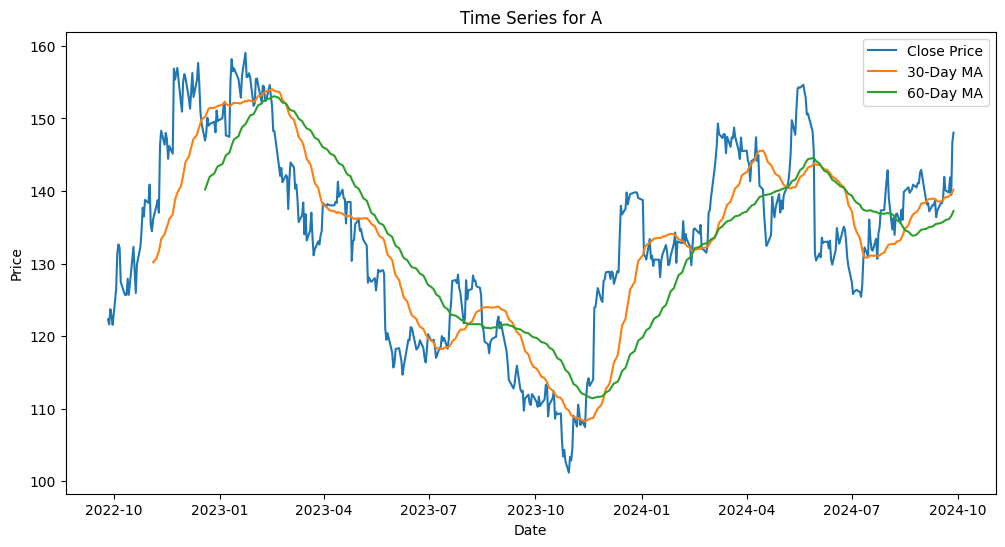

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv('../time_series_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
sector_info = pd.read_csv('../stock_info.csv')
sector_info = sector_info[~(sector_info['Sector']=='Unknown')]
# Merge sector information
df = pd.merge(df, sector_info[['Ticker', 'Sector']], on='Ticker')

# Calculate returns
df['Returns'] = df.groupby('Ticker')['Close'].pct_change()

# 1. Time Series Line Plot with Moving Averages
def plot_time_series(ticker):
    stock_data = df[df['Ticker'] == ticker].sort_values('Date')
    stock_data['MA30'] = stock_data['Close'].rolling(window=30).mean()
    stock_data['MA60'] = stock_data['Close'].rolling(window=60).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.plot(stock_data['Date'], stock_data['MA30'], label='30-Day MA')
    plt.plot(stock_data['Date'], stock_data['MA60'], label='60-Day MA')
    plt.title(f'Time Series for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot for a sample stock
sample_ticker = df['Ticker'].unique()[0]
plot_time_series(sample_ticker)

In [164]:
## removing stock with Unknown sector
# sector_info = sector_info[~(sector_info['Sector']=='Unknown')]
sector_info.Sector.value_counts()

Sector
Technology                82
Industrials               69
Financial Services        66
Healthcare                63
Consumer Cyclical         55
Consumer Defensive        36
Utilities                 32
Real Estate               31
Basic Materials           22
Energy                    22
Communication Services    22
Name: count, dtype: int64

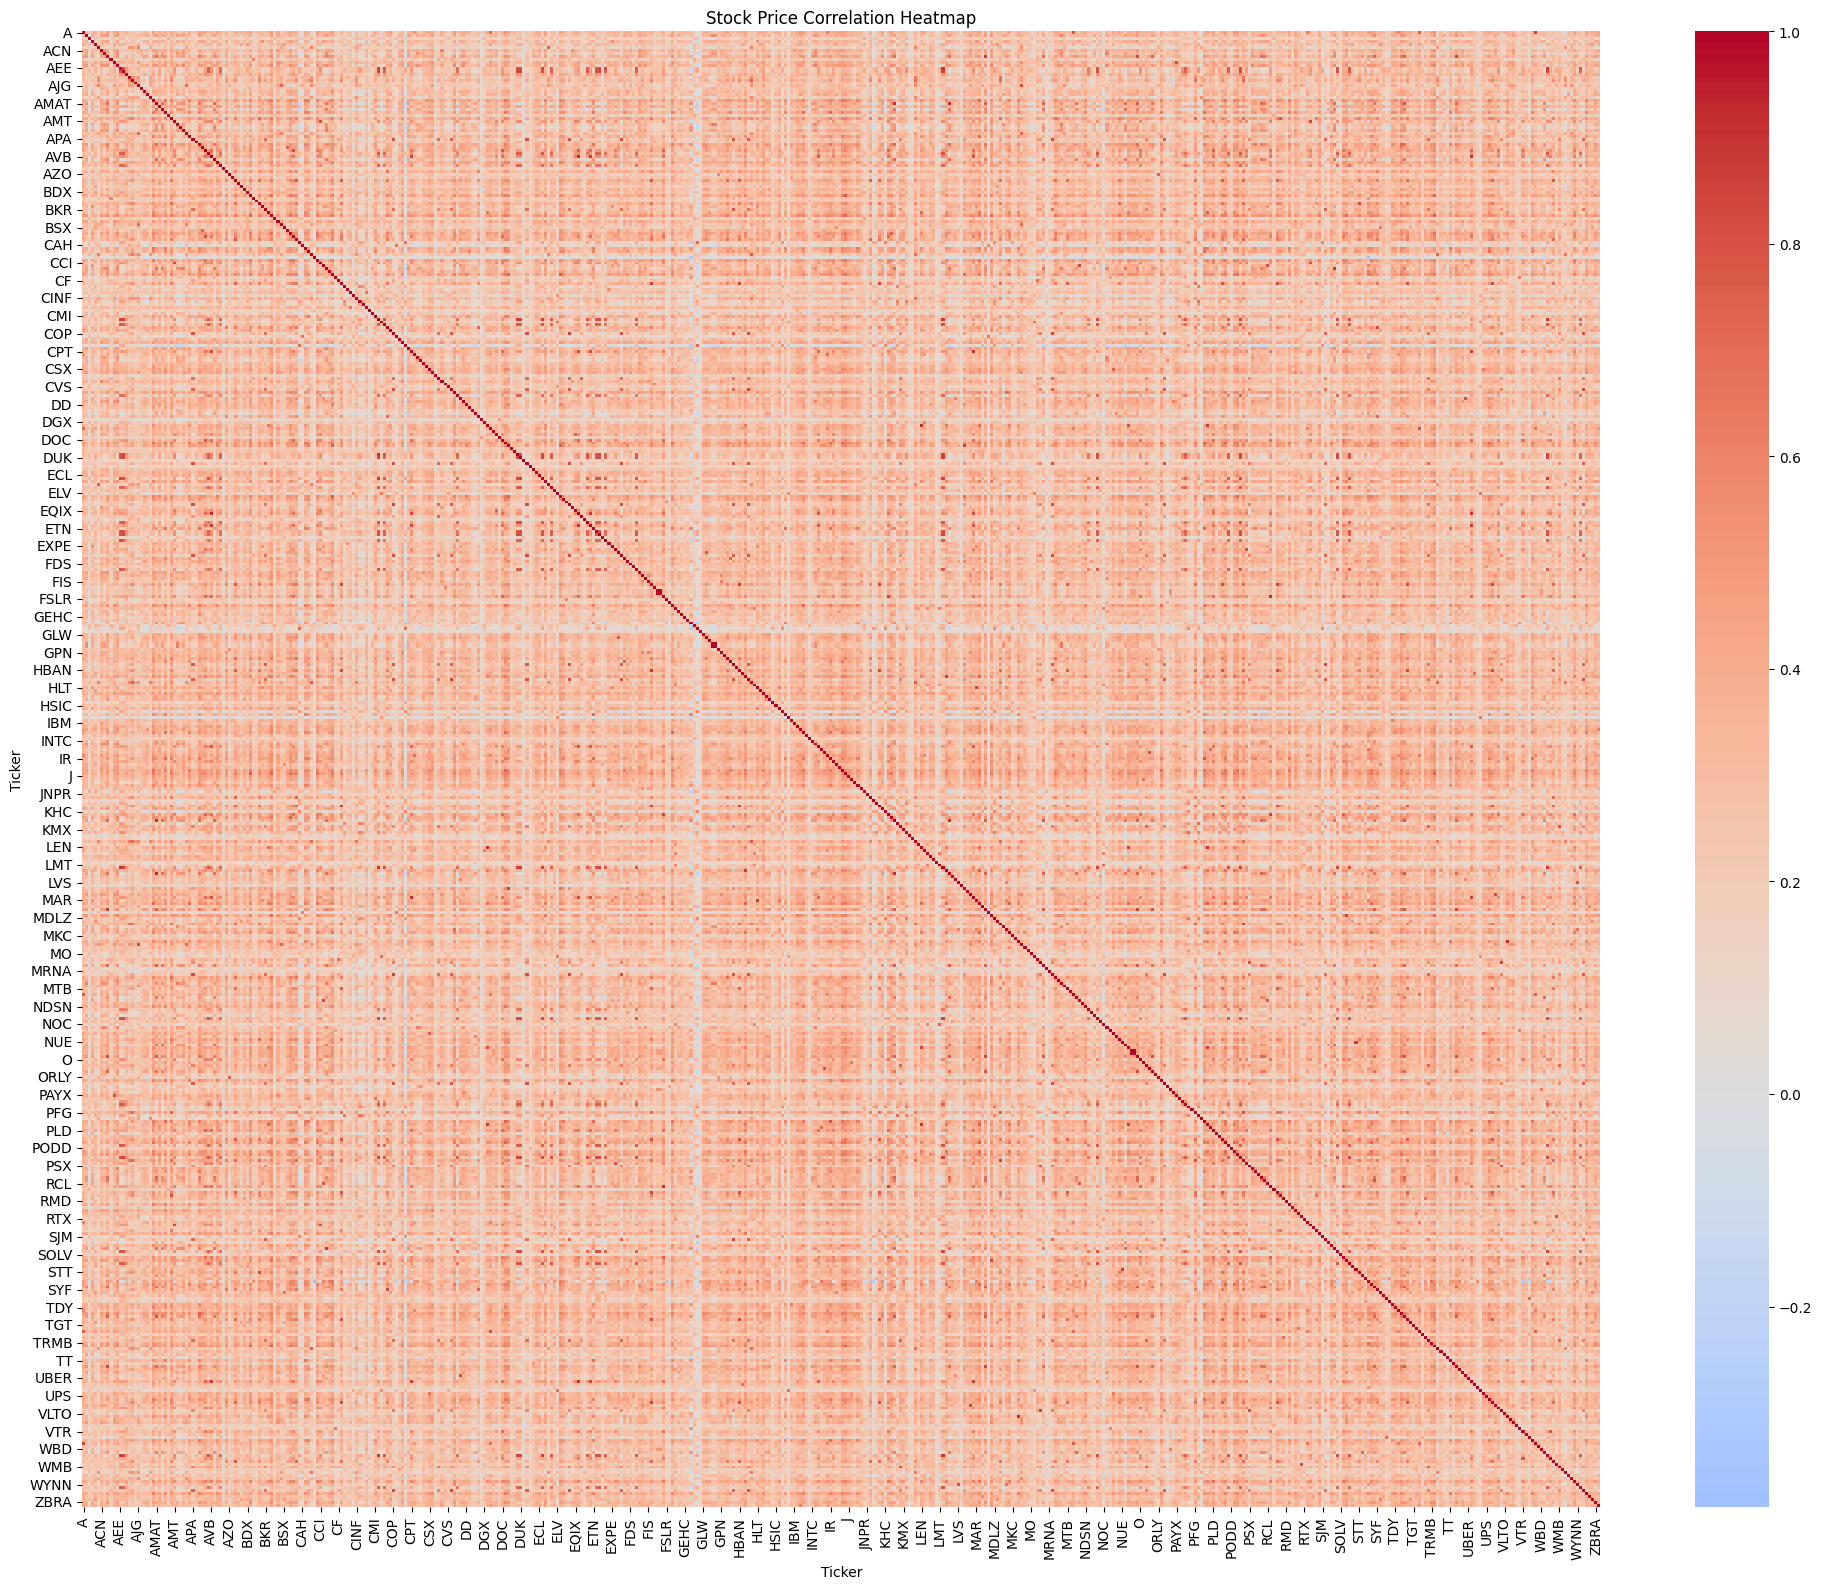

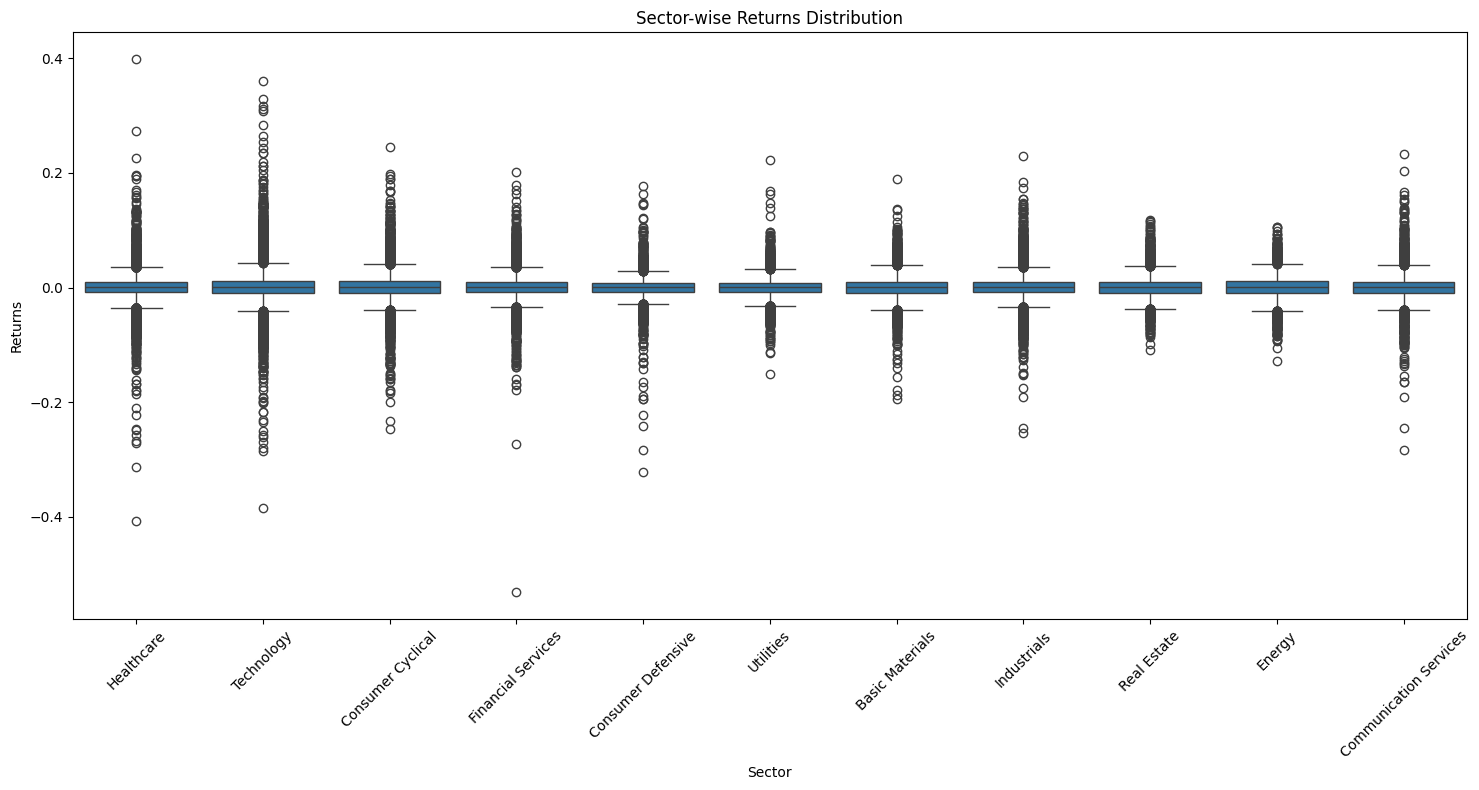

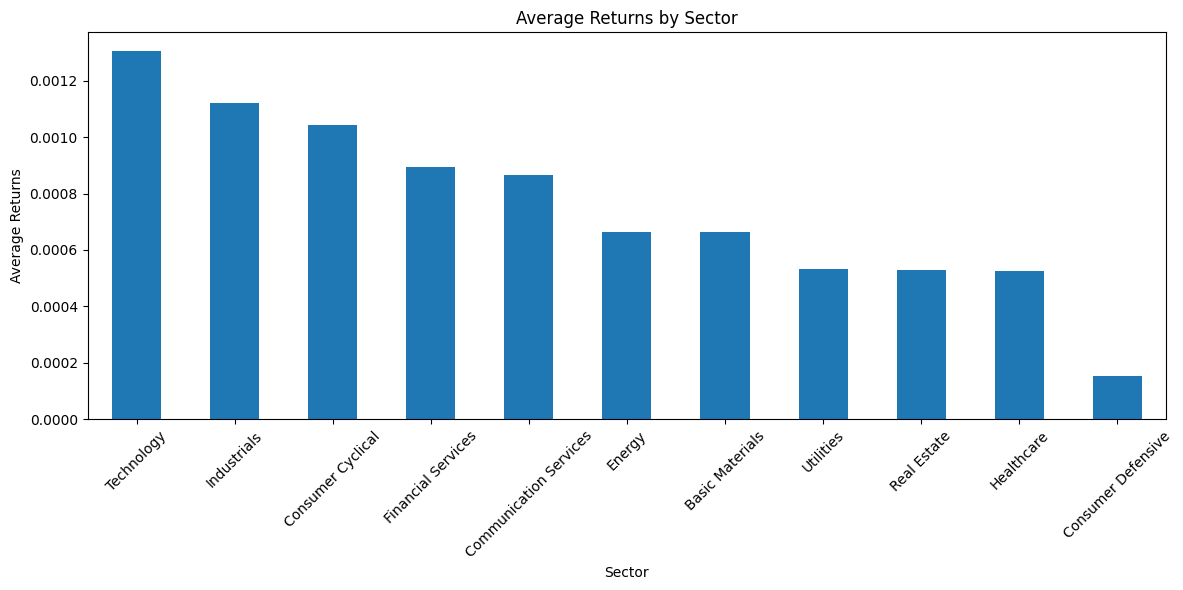

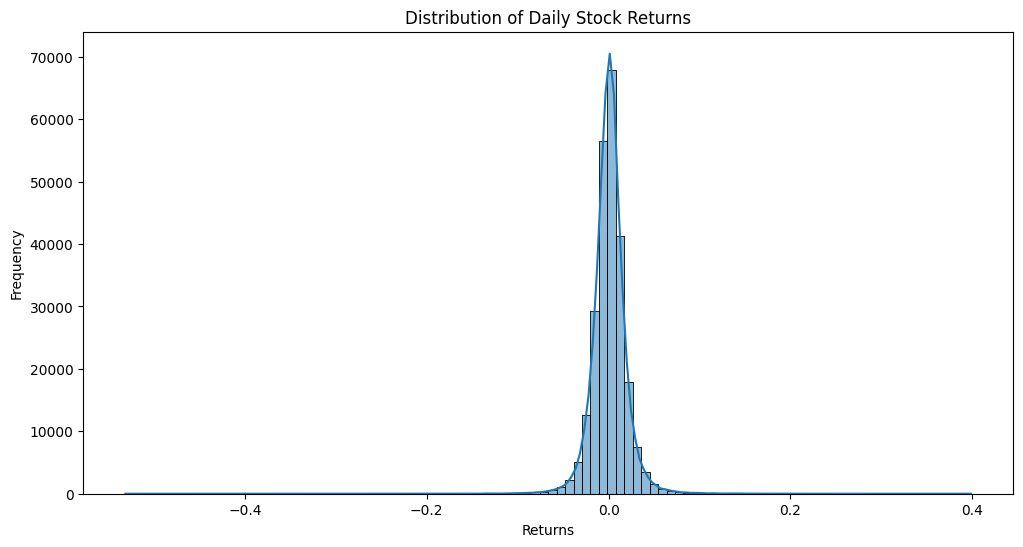

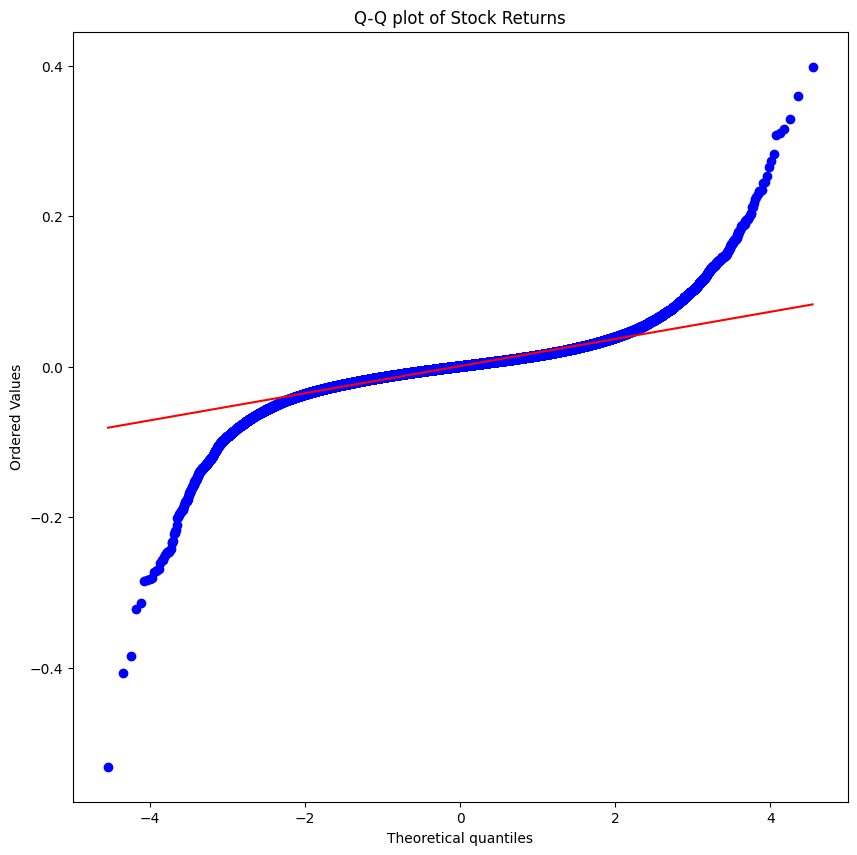

<Figure size 1200x600 with 0 Axes>

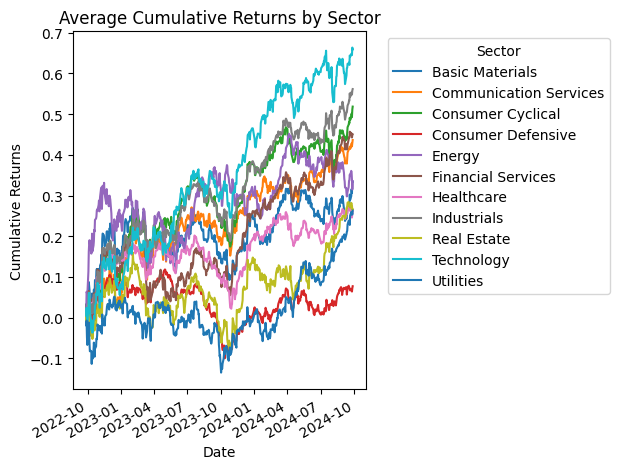

In [163]:


# 2. Heatmap for Stock Price Correlations
price_pivot = df.pivot(index='Date', columns='Ticker', values='Close')
correlation_matrix = price_pivot.pct_change().corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Stock Price Correlation Heatmap')
plt.tight_layout()
plt.show()

# 3. Box Plots for Sector-wise Returns Distribution
plt.figure(figsize=(15, 8))
sns.boxplot(x='Sector', y='Returns', data=df)
plt.title('Sector-wise Returns Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Sector-Wise Returns: Aggregate sectoral performance
sector_returns = df.groupby('Sector')['Returns'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sector_returns.plot(kind='bar')
plt.title('Average Returns by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Histograms for Daily Stock Return Distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['Returns'].dropna(), kde=True, bins=100)
plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Additional: Q-Q Plot for Returns
plt.figure(figsize=(10, 10))
stats.probplot(df['Returns'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q plot of Stock Returns")
plt.show()

# Bonus: Cumulative Returns by Sector
df['Cumulative_Returns'] = df.groupby('Ticker')['Returns'].cumsum()
avg_cumulative_returns = df.groupby(['Date', 'Sector'])['Cumulative_Returns'].mean().unstack()

plt.figure(figsize=(12, 6))
avg_cumulative_returns.plot()
plt.title('Average Cumulative Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. Distribution of Daily Stock Returns (Image 1):
   - The distribution is highly peaked around 0, indicating that most daily returns are close to zero.
   - The distribution has heavy tails, especially on the negative side, suggesting the presence of extreme negative returns.
   - The shape resembles a leptokurtic distribution, which is common in financial return data.

2. Q-Q Plot of Stock Returns (Image 2):
   - The Q-Q plot compares the quantiles of the stock returns against the theoretical quantiles of a normal distribution.
   - The plot deviates significantly from the straight line, especially at the tails.
   - This confirms that the stock returns do not follow a normal distribution and exhibits heavy tails.
   - The presence of outliers at both ends of the distribution is evident.

3. Average Cumulative Returns by Sector (Image 3):
   - The plot shows the cumulative returns over time for different sectors.
   - Technology and Consumer Cyclical sectors have outperformed others, with the highest cumulative returns.
   - Energy and Real Estate sectors have underperformed, with negative cumulative returns for most of the period.
   - The plot reveals sector-wise differences in performance and highlights the importance of sector analysis.

Overall, the additional plots provide valuable insights into the distribution and characteristics of stock returns:
- The returns are highly peaked around zero with heavy tails, indicating the presence of extreme events.
- The returns deviate from normality, as confirmed by the Q-Q plot, which has implications for risk modeling and analysis.
- Sector-wise analysis reveals performance differences, with Technology and Consumer Cyclical leading and Energy and Real Estate lagging.

These findings can inform the approach to classify stocks as up, down, or flat:
- The heavy tails and outliers in the return distribution should be considered when defining thresholds for classification.
- Sector-specific trends and patterns can be incorporated to refine the classification criteria.
- The non-normality of returns should be accounted for in any statistical analysis or modeling.